# Notebook to:
- Visualize graphs
- See the Q table

In [1]:
# library imports
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
# local imports
from environment import TreasureCube
from agents.RandomAgent import RandomAgent
from agents.QLearningAgent import QLearningAgent

In [2]:
def showPlot(X, Y, xlabel, ylabel):
    plt.plot(X, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [3]:
def test_cube(max_episode, max_step):
    env = TreasureCube(max_step=max_step)
    agent = QLearningAgent()
    episode_rewards = []
    for epsisode_num in tqdm(range(0, max_episode)):
        state = env.reset()
        terminate = False
        t = 0
        episode_reward = 0
        while not terminate:
            action = agent.take_action(state)
            # print(action)
            reward, terminate, next_state = env.step(action)
            episode_reward += reward
            t += 1
            agent.train(state, action, next_state, reward)
            state = next_state
        # print(
        #     f'episode: {epsisode_num}, total_steps: {t} episode reward: {episode_reward}')
        episode_rewards.append(episode_reward)
    # plot =  showPlot(list(range(max_episode)), episode_rewards,
    #                 'episode', 'episode rewards')
    qTable = agent.getQTable()
    return episode_rewards, qTable


In [4]:
max_episode = 200
max_step = 500  
episode_rewards, qTable = test_cube(max_episode, max_step)

100%|██████████| 200/200 [00:00<00:00, 469.62it/s]


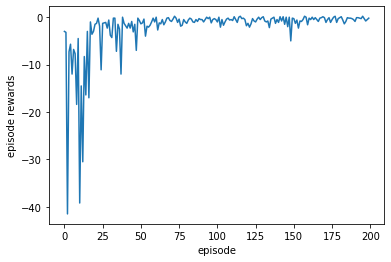

In [5]:
showPlot(range(max_episode), episode_rewards, xlabel='episode', ylabel= 'episode rewards')

In [6]:
qTable

,000,001,002,003,010,011,012,013,020,021,...,312,313,320,321,322,323,330,331,332,333
right,-0.467656,-0.459737,-0.439729,-0.365489,-0.411251,-0.389651,-0.374907,-0.357693,-0.300859,-0.375835,...,0.158274,0.584641,-0.206208,-0.168872,-0.113946,0.899924,-0.192017,-0.111019,-0.087327,0
left,-0.534404,-0.476730,-0.433656,-0.365997,-0.483756,-0.423369,-0.377576,-0.337932,-0.425593,-0.377567,...,-0.207174,-0.165677,-0.222711,-0.177434,-0.119202,-0.045957,-0.180850,-0.096677,-0.097696,0
forward,-0.534098,-0.480354,-0.373844,-0.368213,-0.497876,-0.421384,-0.379849,-0.335974,-0.394864,-0.294285,...,-0.213153,-0.141266,-0.215039,-0.159044,-0.118014,-0.030000,-0.192017,-0.092827,-0.087327,0
backward,-0.539491,-0.480867,-0.445343,-0.354914,-0.486484,-0.436070,-0.374241,-0.351861,-0.397550,-0.374995,...,-0.210285,-0.145920,-0.215990,-0.186862,-0.104447,-0.048078,-0.203152,-0.103517,-0.075973,0
up,-0.532872,-0.480793,-0.440120,-0.359964,-0.487323,-0.417911,-0.366537,-0.339910,-0.427865,-0.376505,...,-0.213333,-0.162453,0.201061,0.181794,0.543539,-0.030000,0.202911,0.544351,0.898193,0
down,-0.533815,-0.485734,-0.451442,-0.384913,-0.494030,-0.436166,-0.373986,-0.360357,-0.395777,-0.378558,...,-0.222203,-0.171871,-0.224186,-0.167821,-0.115227,-0.053723,-0.194408,-0.102591,-0.088858,0
